# Import Packages

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from kneed import KneeLocator, DataGenerator
import seaborn as sns
import scipy.cluster.hierarchy as sch

import sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.cluster
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs


In [2]:
import os
os.getcwd()

'C:\\Users\\mhann\\OneDrive - UC Irvine\\Q4 Spring Session\\NLP\\NLP Final Project'

# Load Data

In [3]:
df = pd.read_csv(r"C:\\Users\\mhann\\OneDrive - UC Irvine\\Q4 Spring Session\\NLP\\NLP Final Project\animes_df.csv")
df

,Unnamed: 0,title,synopsis,genre,rating,adult
0,0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",PG-13 - Teens 13 or older,1
1,1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",PG-13 - Teens 13 or older,1
2,2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",PG - Children,0
3,3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...",PG-13 - Teens 13 or older,1
4,4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",PG-13 - Teens 13 or older,1
...,...,...,...,...,...,...
13741,14473,Koisuru Boukun,Tetsuhiro Morinaga is in love with his uppercl...,"['Comedy', 'Romance', 'Yaoi']",G - All Ages,1
13742,14474,Tentou Mushi no Uta,The adventures of seven orphan who live in pov...,"['Drama', 'Slice of Life']",G - All Ages,0
13743,14475,Koakuma Kanojo The Animation,It is rumored that a mysterious DVD exists and...,"['Hentai', 'Supernatural', 'School']",R - 17+ (violence & profanity),1
13744,14476,Tamayura: More Aggressive Picture Drama,Picture drama included in the 1st Blu-ray and ...,"['Comedy', 'Drama']",G - All Ages,0


# Data Preprocessing for Clustering - Dummifying Genres

In [4]:
df.genre = df.genre.apply(lambda s: list(ast.literal_eval(s)))

In [5]:
df['genre'][0][1]

'Sports'

In [6]:
s = pd.Series(df.genre)
dummy = pd.get_dummies(s.apply(pd.Series).stack()).groupby(level=0).sum()
dummy

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13741,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13742,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13744,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2 = pd.concat([df, dummy], axis=1)
df2.columns

Index(['Unnamed: 0', 'title', 'synopsis', 'genre', 'rating', 'adult', 'Action',
       'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei',
       'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [8]:
df2 = df2.drop('Unnamed: 0',1)
df2

<ipython-input-8-b989705dfb04>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('Unnamed: 0',1)


,title,synopsis,genre,rating,adult,Action,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",PG-13 - Teens 13 or older,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",PG-13 - Teens 13 or older,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",PG - Children,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",PG-13 - Teens 13 or older,1,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",PG-13 - Teens 13 or older,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13741,Koisuru Boukun,Tetsuhiro Morinaga is in love with his uppercl...,"[Comedy, Romance, Yaoi]",G - All Ages,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13742,Tentou Mushi no Uta,The adventures of seven orphan who live in pov...,"[Drama, Slice of Life]",G - All Ages,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13743,Koakuma Kanojo The Animation,It is rumored that a mysterious DVD exists and...,"[Hentai, Supernatural, School]",R - 17+ (violence & profanity),1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13744,Tamayura: More Aggressive Picture Drama,Picture drama included in the 1st Blu-ray and ...,"[Comedy, Drama]",G - All Ages,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print("adults =",len(df2[df2.adult==1]))
    
print("kids =",len(df2[df2.adult==0]))

adults = 8531
kids = 5215


# Split into Train and Test Sets

In [10]:
df_x = df.synopsis
df_y = df.adult

In [7]:
df_x.head()

0    Following their participation at the Inter-Hig...
1    Music accompanies the path of the human metron...
2    The Abyss—a gaping chasm stretching down into ...
3    "In order for something to be obtained, someth...
4    After helping revive the legendary vampire Kis...
Name: synopsis, dtype: object

In [7]:
df_y.head()

0    1
1    1
2    0
3    1
4    1
Name: adult, dtype: int64

In [52]:
print("adults =",len(y_train[y_train==1]))
    
print("kids =",len(y_train[y_train==0]))

adults = 5976
kids = 3646


In [11]:
x_train, x_test, y_train, y_test = train_test_split(
            df_x, df_y, test_size = 0.3, random_state=42)

In [12]:
#X_train.dropna(inplace=True)
x_train.isna().sum().sum()

0

In [10]:
x_train.head()

1336     Sequel of Goulart Knights: Evoked the Beginnin...
12397    Music video directed by Kakeru Mizui for the s...
13272    Heroman specials released in DVD/BD volumes 2,...
11771    The OVA Special which teams the Anime version ...
10402    Having finished high school, Gorou Honda sets ...
Name: synopsis, dtype: object

In [10]:
cv = CountVectorizer()

X= cv.fit_transform(x_train)

In [64]:
train_array = X.toarray()
train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
features = cv.get_feature_names()
features[1000:1005]

['afghanistan', 'aflac', 'afloat', 'aflutter', 'afoot']

In [14]:
cv.inverse_transform(train_array[0])
#shows the first synopsis

[array(['beginning', 'black', 'evoked', 'goulart', 'knights', 'of',
        'sequel', 'the'], dtype='<U24')]

In [15]:
x_train.iloc[0]
#first synopsis

'Sequel of Goulart Knights: Evoked the Beginning Black.'

In [11]:
tf = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [12]:
tfidf= tf.fit_transform(x_train)
tfidf

<9622x33801 sparse matrix of type '<class 'numpy.float64'>'
	with 302384 stored elements in Compressed Sparse Row format>

In [18]:
train_array = tfidf.toarray()

In [19]:
features = tf.get_feature_names()
features[1000:1005]

['aflutter', 'afoot', 'aforementioned', 'afortiori', 'afoul']

In [20]:
tfidf[0]

<1x33801 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [21]:
tf.inverse_transform(tfidf[0])
#shows the first synopsis

[array(['black', 'beginning', 'evoked', 'knights', 'goulart', 'sequel'],
       dtype='<U24')]

In [22]:
x_train.iloc[0]

'Sequel of Goulart Knights: Evoked the Beginning Black.'

In [23]:
#convert Adult 0's and 1's into integer
y_train = y_train.astype('int')

In [24]:
x_train.head()

1336     Sequel of Goulart Knights: Evoked the Beginnin...
12397    Music video directed by Kakeru Mizui for the s...
13272    Heroman specials released in DVD/BD volumes 2,...
11771    The OVA Special which teams the Anime version ...
10402    Having finished high school, Gorou Honda sets ...
Name: synopsis, dtype: object

In [30]:
# from sklearn.metrics.pairwise import euclidean_distances

# text = df2['synopsis']
# features = vectorizer.fit_transform(text).todense() 
# print( vectorizer.vocabulary_ )

# for f in features:
#     print( euclidean_distances(features[0], f) )

In [31]:
# cols=[ 'Action',
#        'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
#        'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei',
#        'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
#        'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
#        'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
#        'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
#        'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']

# X = data
# # 
# y = df2.adult

# X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size = 0.3, random_state=42)


# Elbow Method

In [32]:
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf)
    distortions.append(kmeanModel.inertia_)

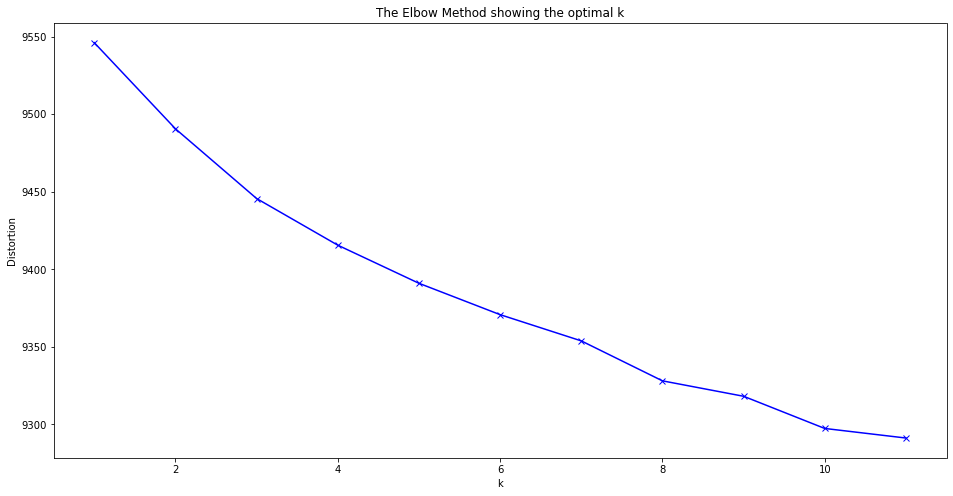

In [33]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# KneeLocator

In [34]:
def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(tfidf)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

In [35]:
find_k(tfidf)

9

# KMeans

k-means clustering is an unsupervised clustering algorithm that gathers and groups data into k number of clusters

k-means clustering represent distance-based algorithms that rely on a metric

In [36]:
kmeans = KMeans(n_clusters = 9, random_state=42)

In [37]:
kmeans_model = kmeans.fit(tfidf)

In [38]:
labels = kmeans_model.labels_
labels

array([7, 5, 0, ..., 7, 7, 1])

In [39]:
kmeans.n_iter_
#number of clusters required to converge

27

In [40]:
cluster_centers = kmeans.cluster_centers_

In [41]:
#return cluster center synopsis

vocab_inverted = {}
for word, column_index in cv.vocabulary_.items():
    vocab_inverted[column_index] = word
    
def summarize_cluster(center, inv_voc, n):
    # the centroid is a vector; we'll first make a list of weights and their corresponding dimensions
    # e.g. [ (0.345, 0), (1.48, 1), (0.95, 2), ...]
    center_index = [ (x, i) for i, x in enumerate(center) ]

    # we sort this by the weights and select the top n
    topn = sorted(center_index, reverse=True)[:n]

    # we finally map this back to words, using the inverted vocabulary dict that we created above
    return [ inv_voc[i] for _, i in topn ]

for i, c in enumerate(cluster_centers):
    print('{}:'.format(i), ' '.join(summarize_cluster(c, vocab_inverted, 10)))

0: blithely duchy radwimps imperialist someone tsunashi vegetation entertainers vegetables rediscovered
1: fermenting shinra anguish ebizori synthetic fukai runesoft tomoshibi suspiciously obstacle
2: moonrise shinra unesco surfing clansmen adapts seishu incorporating kogarashi commissions
3: wenches dustiness sns magecraft whistle resolved necessities mundanity vindicated legged
4: seishu entertainers entertaining triforce ranked soma duchy anidb ainz rediscovering
5: usuta mouri slogan unnumbered mikio negativity oahu prepare albedo farms
6: bargaining majesty g7 buffeted vegetables adrift anidb envylia lessons eat
7: sns sari stall geometric animetric anidb necessities legged daoko loaned
8: scams scarecrow seishu forces 2nd entertainers tamine 3rd shunsou potomas


# PCA Graph

In [42]:
#plot clusters

In [66]:
Sc = StandardScaler()
X = Sc.fit_transform(train_array)
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2'])

In [68]:
df, y = make_blobs(n_samples=70, centers=9, n_features=43,random_state=999,cluster_std=1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

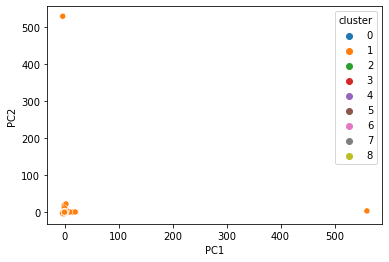

In [69]:
kmeans =KMeans(n_clusters=9).fit(X)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

# Silhouette Score

In [ ]:
#from sklearn import metrics

In [44]:
kmeans_model = KMeans(n_clusters=9, random_state=1).fit(tfidf)
labels = kmeans_model.labels_
metrics.silhouette_score(tfidf, labels, metric='euclidean')
#The score isbetween -1 for incorrect clustering and +1 for highly dense clustering. 
#Scores around zero indicate overlapping clusters.
#Score higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

0.0067565160871760266

# Purity Score

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [47]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)

test_tfidf=tfidf_vec.fit_transform(x_test)

print(test_tfidf.shape)

kmeans_predict = kmeans.fit_predict(test_tfidf)
print(kmeans_predict)

(4124, 144112)
[5 6 0 ... 5 0 0]


(array([ 308., 2081.,  395.,  568.,    0.,  269., 4104.,  897.,  457.,
         543.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

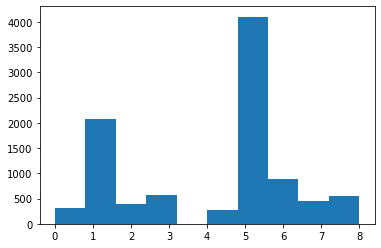

In [13]:
clusterer = KMeans(n_clusters=9, init='k-means++', max_iter=100, n_init=1)
clusts = clusterer.  fit_predict(tfidf)
plt.hist(clusts)

In [19]:
def purity_score(c, y):
  '''From: http://www.caner.io/purity-in-python.html'''
  A = np.c_[(c,y)]
  n_accurate = 0.
  for j in np.unique(A[:,0]):
    z = A[A[:,0] == j, 1]
    x = np.argmax(np.bincount(z))
    n_accurate += len(z[z == x])
  return n_accurate / A.shape[0]
  
def cluster_purity(c, y):
  numy = len(set(y))
  cvals = list(set(c)) #[str(ce) for ce in list(set(c))]
  numc = len(cvals)
  ind = [str(cval) for cval in cvals] #np.arange(numc)
  bottom = np.zeros(numc)
  for yidx in range(numy):
    counts = np.zeros(numc)
    for cidx in range(numc): #for cluster index in the number of cluster
      num = len(list(filter(lambda p: p[0]==cvals[cidx] and p[1]==yidx, zip(c,y)))) 
    # number of( p[0] for cluster value, p[1] for actual label index, combine cluster value with label)
      counts[cidx] = num
    ax =plt.bar(ind, counts,bottom=bottom)
    plt.xlabel("Cluster")
    plt.ylabel("Count of Animes")

    bottom = bottom + counts
  plt.legend(y_train,loc=2)
  


In [49]:
print('Purity:', purity_score(clusts, y_train))

Purity: 0.6210766992309291


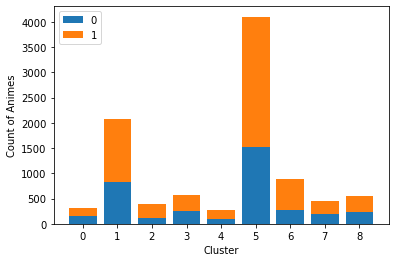

In [28]:
cluster_purity(clusts,y_train)

k= 1 done, inertia: 9546.056999850793
k= 2 done, inertia: 9494.201679926176
k= 3 done, inertia: 9452.51633980935
k= 4 done, inertia: 9424.234542220625
k= 5 done, inertia: 9400.12913289287
k= 6 done, inertia: 9377.646076728968
k= 7 done, inertia: 9354.272233051885
k= 8 done, inertia: 9336.689170440464
k= 9 done, inertia: 9332.143266418967


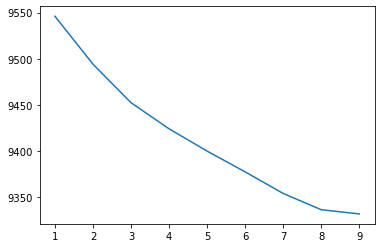

In [63]:
inertias = []
krange = range(1,10)
for k in krange:
  tclusterer = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
  tclusterer.fit_predict(tfidf)
  inertias.append(tclusterer.inertia_)
  print('k=',k,'done, inertia:', tclusterer.inertia_)
plt.plot(krange, inertias)

# K Nearest Neighbors

 supervised classification algorithm that will give new data points accordingly to the k number or the closest data points,

In [ ]:
# text_clf = Pipeline([
#     ('cv', CountVectorizer(lowercase=True)),
#     ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)),
#     ('knn', NearestNeighbors(n_neighbors=num_neighs+1, algorithm='brute', metric='cosine'))
# ])
# # Fitting our train data to the pipeline
# text_clf.fit(list(x_train), list(y_train))


# # Predicting our test data
# predicted = text_clf.predict(list(x_test))

In [66]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline

In [64]:

tfidf_vec = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)
x_train_tfidf = tfidf_vec.fit_transform(x_train)
x_test_tfidf = tfidf_vec.transform(x_test)
   

In [67]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(x_train_tfidf, y_train)

In [68]:
predicted = knn_model.predict(x_test_tfidf)

In [69]:
print(metrics.classification_report(list(y_test), predicted))

              precision    recall  f1-score   support

           0       0.40      0.78      0.53      1569
           1       0.68      0.30      0.41      2555

    accuracy                           0.48      4124
   macro avg       0.54      0.54      0.47      4124
weighted avg       0.58      0.48      0.46      4124



In [71]:
from sklearn.metrics import confusion_matrix
def conf_matrix(y_true, y_predict):
  data = confusion_matrix(y_true, y_predict)
  index = ['Actual_0', 'Actual_1']
  columns = ['Predicted_0', 'Predicted_1']
  return pd.DataFrame(data, index, columns)



In [72]:
conf_matrix(y_test,predicted)

,Predicted_0,Predicted_1
Actual_0,1216,353
Actual_1,1798,757


In [73]:
print('We got an accuracy of',np.mean(predicted == list(y_test))*100, '% over the test data.')

We got an accuracy of 47.84190106692531 % over the test data.


In [97]:
print('Purity:', purity_score(x_test_tfidf, predicted))
cluster_purity(x_test_tfidf, predicted)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 4124

# Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [76]:
mnb.fit(tfidf,y_train)

MultinomialNB()

In [77]:
x_testcv=tf.transform(x_test)

In [78]:
pred = mnb.predict(x_testcv)

In [79]:
pred

array([1, 1, 1, ..., 0, 1, 1])

In [80]:
actual = np.array(y_test)
actual

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [81]:
from sklearn import metrics
print(metrics.confusion_matrix(actual, pred, labels=[1,0]))
print(metrics.classification_report(actual, pred, labels=[1,0]))

[[2520   35]
 [1532   37]]
              precision    recall  f1-score   support

           1       0.62      0.99      0.76      2555
           0       0.51      0.02      0.05      1569

    accuracy                           0.62      4124
   macro avg       0.57      0.50      0.40      4124
weighted avg       0.58      0.62      0.49      4124



In [82]:
conf_matrix(actual,pred)

,Predicted_0,Predicted_1
Actual_0,37,1532
Actual_1,35,2520


In [83]:
frac_correct = np.mean(pred == actual)
print('We got an accuracy of',frac_correct*100, '% over the test data.')

We got an accuracy of 62.002909796314256 % over the test data.


# DBScan

In [30]:
# Purity of eps_range, number of samples, purity score

features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)
train_vectors = features.fit_transform(x_train)
eps_range = np.arange(0.86,0.87,0.01)
max_purity = 0
for i in range(len(eps_range)):
    for j in range(10, 100, 10):
        clusterer = sklearn.cluster.DBSCAN(eps=eps_range[i], min_samples=j, metric='cosine')
        clusts = clusterer.fit_predict(train_vectors)
        score = purity_score(clusts, y_train)
        print('Purity:', eps_range[i], ",", j, "::",  score)
        if( score > max_purity):
            opt_eps = eps_range[i]
            opt_min_sample = j 
            max_purity = score

#opt_min_sample = 10
#opt_eps = 0.87



Purity: 0.86 , 10 :: 0.6222199127000624
Purity: 0.86 , 20 :: 0.6210766992309291
Purity: 0.86 , 30 :: 0.6210766992309291
Purity: 0.86 , 40 :: 0.6210766992309291
Purity: 0.86 , 50 :: 0.6210766992309291
Purity: 0.86 , 60 :: 0.6210766992309291
Purity: 0.86 , 70 :: 0.6211806277281231
Purity: 0.86 , 80 :: 0.621284556225317
Purity: 0.86 , 90 :: 0.621284556225317
Purity: 0.87 , 10 :: 0.6214924132197048
Purity: 0.87 , 20 :: 0.6210766992309291
Purity: 0.87 , 30 :: 0.6210766992309291
Purity: 0.87 , 40 :: 0.6210766992309291
Purity: 0.87 , 50 :: 0.6210766992309291
Purity: 0.87 , 60 :: 0.6210766992309291
Purity: 0.87 , 70 :: 0.621388484722511
Purity: 0.87 , 80 :: 0.621388484722511
Purity: 0.87 , 90 :: 0.621388484722511


(array([9.463e+03, 2.800e+01, 1.000e+01, 1.900e+01, 1.100e+01, 4.200e+01,
        7.000e+00, 1.000e+01, 1.300e+01, 1.900e+01]),
 array([-1. ,  0.2,  1.4,  2.6,  3.8,  5. ,  6.2,  7.4,  8.6,  9.8, 11. ]),
 <BarContainer object of 10 artists>)

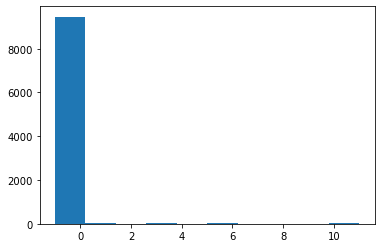

In [31]:
clusterer = sklearn.cluster.DBSCAN(eps=opt_eps, min_samples=opt_min_sample, metric='cosine')
clusts = clusterer.fit_predict(train_vectors)
plt.hist(clusts)

In [28]:
opt_eps, opt_min_sample

(0.86, 10)

Purity: 0.6222199127000624


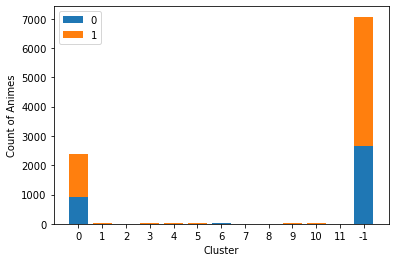

In [32]:
cluster_purity(clusts, y_train)
print('Purity:', purity_score(clusts, y_train))

In [54]:
print("adults =",len(y_train[y_train==1]))
    
print("kids =",len(y_train[y_train==0]))

adults = 5976
kids = 3646


# Agglomerative Clustering

In [13]:
num_points = 1000
data = x_train[:num_points]
target= y_train[:num_points]
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)
vecs = features.fit_transform(data)
aggclusterer = sklearn.cluster.AgglomerativeClustering() 
clusts = np.array(aggclusterer.fit_predict(vecs.toarray()))

In [28]:
def clustering_from_tree(clusterer, i):
  n_samples = clusterer.n_leaves_
  nodes = aggclusterer.children_
  pclusts = np.arange(n_samples)
  def label_clust(nid, label):
    if nid < n_samples:
      pclusts[nid] = label
    else:
      lchild = nodes[nid-n_samples][0]
      label_clust(lchild, label)
      rchild = nodes[nid-n_samples][1]
      label_clust(rchild, label)

  #simulate the clustering
  for j in range(i):
    lchild = nodes[j][0]
    label_clust(lchild, n_samples+j)
    rchild = nodes[j][1]
    label_clust(rchild, n_samples+j)
  return pclusts

Number of clusters 500


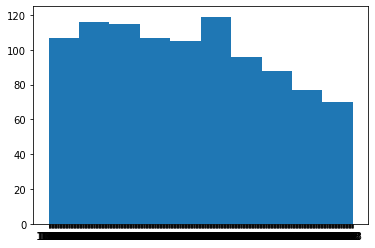

In [31]:
agg_clusts = clustering_from_tree(aggclusterer, 500)
plt.hist([str(c) for c in agg_clusts])
print("Number of clusters", len(list(set(agg_clusts))))

In [ ]:
#import scipy.cluster.hierarchy as sch

In [27]:
agglom_predict = aggclusterer.fit_predict(vecs.toarray())
# print(agglom_predict)

Purity: 1.0


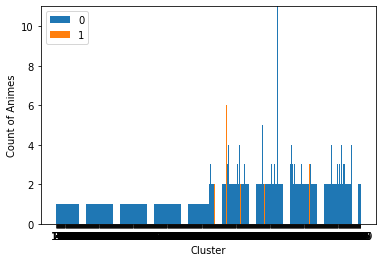

In [29]:
print('Purity:', purity_score(agg_clusts, agglom_predict))
cluster_purity(agg_clusts, agglom_predict)

In [53]:
print("adults =",len(agglom_predict[agglom_predict==1]))
    
print("kids =",len(agglom_predict[agglom_predict==0]))

adults = 10
kids = 490


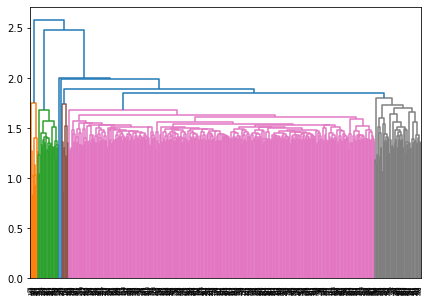

In [90]:
plt.figure(figsize=(7,5))
dend = sch.dendrogram(sch.linkage(vecs.toarray(), method='ward'))
plt.show()

# need help with purity scores

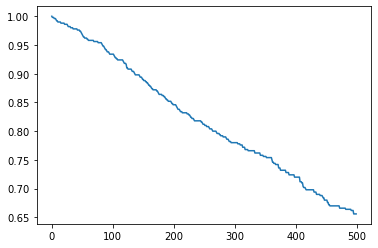

In [88]:
numcs = []
purities = []
for i in range(num_points):
  clusts = clustering_from_tree(clusterer, i)
  numc = len(list(set(clusts)))
  numcs.append(numc)
  purities.append(purity_score(clusts, target))
plt.plot(range(num_points), purities)